In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use(['ggplot'])


## Plain vanilla gradient descent on a function with two variables

The chosen function is the Schaffer function No2:

\begin{equation}
f(x, y)=0.5 + \frac{sin^2(x^2-y^2)-0.5}{(1+0.001(x^2+y^2))^2}
\end{equation}

It has two variables x and y, many local minima, one global maxima and one global minima.

Global minima: \begin{equation}f(x,y)=0, at (x,y)=(0,0)\end{equation}

The function is usually evaluated on the square x ∈ [-100, 100] and y ∈ [-100, 100] for the further visualisation below. 


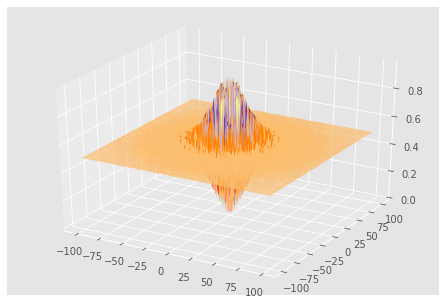

In [2]:
#Plotting 3D figure

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-100, 100, 1)
Y = np.arange(-100, 100, 1)
X, Y = np.meshgrid(X, Y)

R = ((np.sin((X * X - Y * Y)))**2) - 0.5
Q = (1 + 0.001 * (X * X + Y * Y))**2
Z = 0.5 + R/Q
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.Paired)

plt.show()


To illustrate plain vanilla gradient decsent on Schaffer function No2, a class <b>gd_pv</b> is created. It is instantiated with with a loss function, and two functions that return the gradient of the loss function at any given value of x and y. 
- fn_loss
- fn_grad_x
- fn_grad_y

The class contains a method <b>step</b>, which minimises the cost of the given loss function and where the actual gradient descent takes place. It takes initial values for x and y and updates them based on steps taken via the learning rate. 

Then, it outputs the most minimum values of x and y that reaches the stop condition (precision stop), which means that when the absolute difference between our old and updated x and y values are greater than a precision value, the algorithm should stop. 

The method will also print out the minumum of the loss function, the minimum values of x and y, as well as the number of steps or descents it took to reach that value.

It takes which takes following parameters, which must be provided by the user:
- x_init: an initial guess for the value of x that minimises the function
- y_init: an initial guess for the value of y that minimises the function
- n_iter: maximum given number of iterations for the algorythm
- precision: a precision that determines the stop of the stepwise descent 
- l_r: learning rate or step size



In [8]:
class gd_pv:
    
    def __init__(self, fn_loss, fn_grad_x, fn_grad_y):
        self.fn_loss = fn_loss
        self.fn_grad_x = fn_grad_x
        self.fn_grad_y = fn_grad_y
    
    def step(self, x_init, y_init, n_iter, precision, l_r):
        
        #initial values of x and y 
        x = x_init
        y = y_init
                
        #create an empty list for loss function, x and y values
        loss_path = []      
        x_path = []
        y_path = []
        #append the initial value of x, y and loss function
        x_path.append(x)
        y_path.append(y)
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        
        #calculate initail gradient functions of x and y
        g1 = self.fn_grad_x(x,y) 
        g2 = self.fn_grad_y(x,y) 
        
        #create a loop that iterates either n_iter times or until both g1,g2 < precision
        for i in range(n_iter): 
            if (abs(g1) < precision and abs(g2) < precision) or  np.isnan(g1) or  np.isnan(g2):
                break

            #get the gradient from derivations of the itital/previous values of x and y
            g1 = self.fn_grad_x(x,y) 
            g2 = self.fn_grad_y(x,y)  

            #get the new values of x and y by adding the previous, the multiplication of the derivative and the learning rate
            x += -l_r * g1
            y += -l_r * g2

            #append the new values of x to a list of all x-s and y-s
            x_path.append(x)
            y_path.append(y)

            #append new values of the loss function
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)
        
        if  np.isnan(g1) or np.isnan(g2):
            print('Exploded')
        elif  np.abs(g1) > precision or  np.abs(g2) > precision:
            print('Did not converge')
        else:
            print("\nNumber of steps: " + str(i))
            print('\nThe minimum of the loss function: {}'.format(np.round(loss_this, 12)))               
            print("\nGlobal minimum occurs at:\nx = "+ str(x) + "\ny = " + str(y))

                  
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path
        self.loss_fn_min = loss_this
        

Next, we define the argument functions for the gradient descent class. 
- fn_loss: takes in x and y arguments, returns out loss function - Schaffer function No2
- fn_grad_x: takes in x and y arguments, returns differentiated gradient function for any  given value of x
- fn_grad_x: takes in x and y arguments, returns differentiated gradient function for any  given value of y

In [9]:
def fn_loss(x,y):
    return 0.5 + (((np.sin(x**2-y**2))**2)-0.5)/((1+0.001*(x**2+y**2))**2)
    
def fn_grad_x(x,y):
    return -((2000000*x*(2*(np.sin(x*x-y*y)**2)+(-2*x*x-2*y*y-2000)*(np.cos(x*x-y*y))*(np.sin(x*x-y*y))-1))/((x**2+y**2+1000)**3))

def fn_grad_y(x,y):
    return -((2000000*y*((2*np.sin((y-x)*(y+x)))*(np.sin((y-x)*(y+x))-(y*y+x*x+1000)*np.cos((y-x)*(y+x)))-1))/(y*y+x*x+1000)**3)

Now, we can apply plain vanilla gradient descent by instantiating the gd_pv class with the given loss and gradient functions.

In [10]:
#defining the function

schaffer_gd=gd_pv(fn_loss = fn_loss,
           fn_grad_x = fn_grad_x,
           fn_grad_y = fn_grad_y)

In [13]:
#choosing the parameters 
#NOTE: x_new, y_new have to be a rough guess of a next value of x and y close to x_init and y_init

x_init = 2
y_init = 1
n_iter = 5000000
precision = 0.00001
l_r = 0.001

In [14]:
#applying gradient descent to minimse the function

schaffer_gd.step(x_init, y_init, n_iter, precision, l_r)


Number of steps: 1540979

The minimum of the loss function: 0.003126615752

Global minimum occurs at:
x = 1.7723150369215577
y = 0.002523625545385108



With given parameters, gradient descent with learning rate of 0.001 was able to minimise the Schaffer function No2 in 1540979 steps.

By minimising the function, the plain vanilla gradient descent finds the corresponding values of x and y determining the global minimum.

## Different step sizes

To evaluate the changes that occur in the implementation of the gradient descent with different step sizes, we take the same parameters and gradually decrease from  0.01 to 0.0001. Given the complexity of the Schaffer No2 function the number of iterations is set to 10000000. Apart from the step size, the remaining ouput should not change. 

In [18]:
lr = [0.01, 0.003, 0.002, 0.001, 0.0001]
n_iter = 20000000

In [19]:
for i in lr:
    print('---------------------------------------------------------')
    print('Learning Rate is ',i)
    schaffer_gd.step(x_init, y_init,n_iter, precision, i)

---------------------------------------------------------
Learning Rate is  0.01

Number of steps: 154096

The minimum of the loss function: 0.00312661575

Global minimum occurs at:
x = 1.7723150366563327
y = 0.002523439340702954
---------------------------------------------------------
Learning Rate is  0.003

Number of steps: 513658

The minimum of the loss function: 0.003126615752

Global minimum occurs at:
x = 1.7723150368788356
y = 0.002523595553364752
---------------------------------------------------------
Learning Rate is  0.002

Number of steps: 770488

The minimum of the loss function: 0.003126615752

Global minimum occurs at:
x = 1.7723150369076266
y = 0.00252361576598751
---------------------------------------------------------
Learning Rate is  0.001

Number of steps: 1540979

The minimum of the loss function: 0.003126615752

Global minimum occurs at:
x = 1.7723150369215577
y = 0.002523625545385108
---------------------------------------------------------
Learning Rate is


<b>Learning rate of 0.01 minimises the function in 154096 steps.</b>

<b>Learning rate of 0.0001 minimises the function in 15409814 steps.</b>

From the output of the loop, it generally can be that the smaller is the learning rate, the larger is the number of steps required for the gradient descent to minimise the function.


To see individual paths of x and y values with the minimisation of the loss function, refer to graphical outputs below. Learning rates of 0.01 and 0.001 are chosen for the illustration. 


Number of steps: 154096

The minimum of the loss function: 0.00312661575

Global minimum occurs at:
x = 1.7723150366563327
y = 0.002523439340702954


Text(0, 0.5, 'loss')

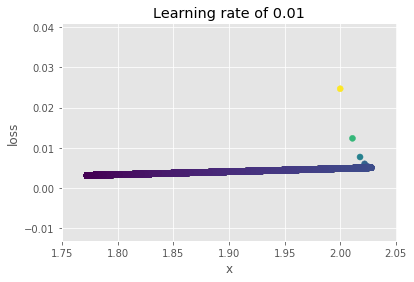

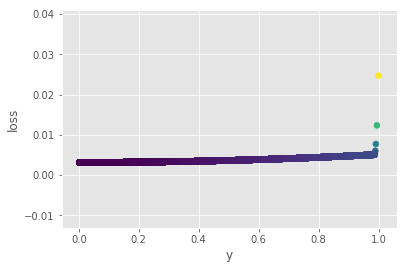

In [20]:
schaffer_gd.step(x_init, y_init, n_iter, precision, 0.01) 

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(schaffer_gd.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(schaffer_gd.x_path, schaffer_gd.loss_path, color=colours)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')
ax1.title.set_text("Learning rate of 0.01")

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(schaffer_gd.y_path, schaffer_gd.loss_path, color=colours)
ax1.set_xlabel('y')
ax1.set_ylabel('loss')


Number of steps: 1540979

The minimum of the loss function: 0.003126615752

Global minimum occurs at:
x = 1.7723150369215577
y = 0.002523625545385108


Text(0, 0.5, 'loss')

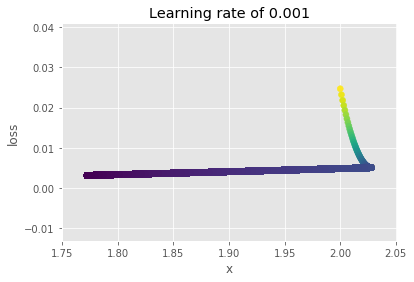

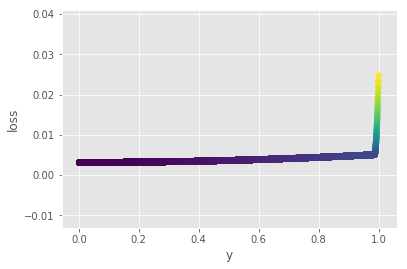

In [21]:
schaffer_gd.step(x_init, y_init, n_iter, precision, 0.001) 

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(schaffer_gd.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(schaffer_gd.x_path, schaffer_gd.loss_path, color=colours)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')
ax1.title.set_text("Learning rate of 0.001")

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(schaffer_gd.y_path, schaffer_gd.loss_path, color=colours)
ax1.set_xlabel('y')
ax1.set_ylabel('loss')

## Momentum gradient descent

For vanilla gradient descent, we use plain derivative as gradient to update the values of x and y. In momentum, instead of using dW and db independently for each iteration, we take the exponentially weighted averages of x and y, with alpa is another hyperparameter called momentum and ranges from 0 to 1. It sets the weight between the average of previous values and the current value to calculate the new weighted average. After calculating exponentially weighted averages, we will update our parameters.

The class for momentum method is created below. Alpha must be predefined by the user.

In [23]:
class momentum:
    
    def __init__(self, fn_loss, fn_grad_x, fn_grad_y):
        self.fn_loss = fn_loss
        self.fn_grad_x = fn_grad_x
        self.fn_grad_y = fn_grad_y
    
    def step(self, x_init, y_init, n_inter, precision, l_r, alpha):
        
        #initial values of x and y 
        x = x_init
        y = y_init
                
        #create an empty list for loss function, x abd y values
        loss_path = []      
        x_path = []
        y_path = []
        
        x_path.append(x)
        y_path.append(y)
        
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        
        g1 = self.fn_grad_x(x,y) 
        g2 = self.fn_grad_y(x,y)
        
        nu1 = 0
        nu2 = 0
        
        for i in range(n_iter):
            
            g1 = self.fn_grad_x(x,y) 
            g2 = self.fn_grad_y(x,y)
            
            if (abs(g1) < precision and abs(g2) < precision) or  np.isnan(g1) or  np.isnan(g2):
                break
            
            nu1 = alpha * nu1 + l_r * g1
            nu2 = alpha * nu2 + l_r * g2
            x += -nu1
            y += -nu2

            #append the new values of x to a list of all x-s and y-s
            x_path.append(x)
            y_path.append(y)

            #append new values of the loss function
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)
        
        if  np.isnan(g1) or np.isnan(g2):
            print('Exploded')
        elif  np.abs(g1) > precision or  np.abs(g2) > precision:
            print('Did not converge')
        else:
            print("\nNumber of steps: " + str(i))
            print('The minimum of the loss function: {}'.format(np.round(loss_this, 12)))               
            print("\nGlobal minimum occurs at:\nx = "+ str(x) + "\ny = " + str(y))

                  
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path
        self.loss_fn_min = loss_this
     

In [24]:
schaffer_momentum = momentum(fn_loss = fn_loss,
                             fn_grad_x = fn_grad_x,
                             fn_grad_y = fn_grad_y)

In [25]:
#Choosing same parameters as in gd_pv
x_init = 2
y_init = 1
n_iter = 6000000
precision = 0.00001
l_r = 0.001
alpha = 0.995

schaffer_momentum.step(x_init, y_init, n_iter, precision, l_r, alpha)



Number of steps: 6044
The minimum of the loss function: 0.003126615741

Global minimum occurs at:
x = 1.77231503692077
y = 0.002522512234943803


## Nesterov's Accelarated Gradient


Another method that is closely related to Momentum method is Nesterov Accelerated Gradient. Momentum method, the gradient was computed using current parameters of <i>nu</i>, whereas in Nesterov Accelerated Gradient, we apply the velocity <i>mu</i> to the parameters <i>nu</i> to compute interim parameters. We then compute the gradient using those interim parameters.

In [26]:
class nag:
    
    def __init__(self, fn_loss, fn_grad_x, fn_grad_y):
        self.fn_loss = fn_loss
        self.fn_grad_x = fn_grad_x
        self.fn_grad_y = fn_grad_y
    
    
    def step(self, x_init, y_init, n_inter, precision, l_r, alpha):
        
        #initial values of x and y 
        x = x_init
        y = y_init
                
        #create an empty list for loss function, x abd y values
        loss_path = []      
        x_path = []
        y_path = []
        
        x_path.append(x)
        y_path.append(y)
        
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        
        g1 = self.fn_grad_x(x,y) 
        g2 = self.fn_grad_y(x,y)
        
        nu1 = 0
        nu2 = 0
        
        for i in range(n_iter):
            #Nesterovs suggestion
            #i starts from 0 so add 1
            mu = 1 - 3 / (i + 1 + 5)
            
            g1 = self.fn_grad_x(x-mu*nu1,y-mu*nu1) 
            g2 = self.fn_grad_y(x-mu*nu2,y-mu*nu2) 
            
            if (abs(g1) < precision and abs(g2) < precision) or  np.isnan(g1) or  np.isnan(g2):
                break
            
            nu1 = alpha * nu1 + l_r * g1
            nu2 = alpha * nu2 + l_r * g2
            x += -nu1
            y += -nu2

            #append the new values of x to a list of all x-s and y-s
            x_path.append(x)
            y_path.append(y)

            #append new values of the loss function
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)
        
        if  np.isnan(g1) or np.isnan(g2):
            print('Exploded')
        elif  np.abs(g1) > precision or  np.abs(g2) > precision:
            print('Did not converge')
        else:
            print("\nNumber of steps: " + str(i))
            print('The minimum of the loss function: {}'.format(np.round(loss_this, 12)))               
            print("\nGlobal minimum occurs at:\nx = "+ str(x) + "\ny = " + str(y))

                  
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path
        self.loss_fn_min = loss_this
        
       

In [27]:
schaffer_nas = nag(fn_loss = fn_loss,
                   fn_grad_x = fn_grad_x,
                   fn_grad_y = fn_grad_y)

In [28]:
#Choosing same parameters as in gd_pv
x_init = 2
y_init = 1
n_inter = 6000000
precision = 0.00001
l_r = 0.001
alpha = 0.995

#applying momentum gradient descent to the schaffer function no2
schaffer_nas.step(x_init, y_init, n_inter, precision, l_r, alpha)



Number of steps: 5150
The minimum of the loss function: 0.003126616002

Global minimum occurs at:
x = 1.7723150759335793
y = -0.002548488797209361


## Evaluation

- Plain Vanilla GD: 1540979 steps
- Momentum GD: 6044 steps
- Nesterev GD: 5150 steps

Comparing three different Gradient Descent methods results, it can clearly been seen that more complex algorithms that backed up by more sophisticated update rules at each iteration t, like Momentum abd  Nesterev GDs, manage to minimise the cost function more efficiently taking the less number of steps. In Leiman terms, while plain vanilla GD simply jumps to the next value of calculated x and y based on the differentiation, more complex GDs jump in a more randomised way. Momentum and Nesterev GD are quite similar to each other, however, for Schaffer No2 function Nesterev GD is the most efficient. 
